In [49]:
import pandas as pd
from tvDatafeed import TvDatafeed, Interval
import matplotlib.pyplot as plt
import talib

In [109]:
tv = TvDatafeed()
df_hourly = tv.get_hist(symbol='WDO2!',
                           exchange='BMFBOVESPA',
                           interval=Interval.in_daily, n_bars=100000)

<Axes: xlabel='datetime'>

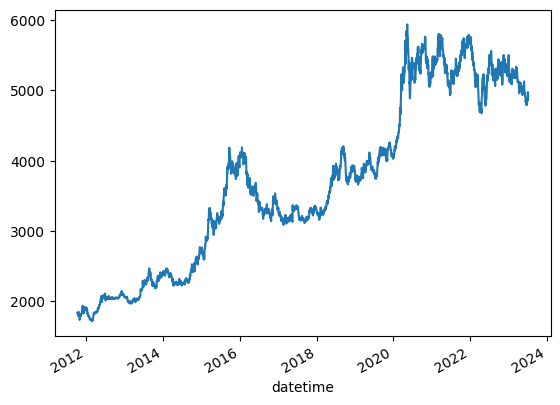

In [110]:
df_hourly['close'].plot()

In [111]:
df = df_hourly.copy()

In [112]:
df['trix'] = talib.TRIX(df["close"], 5)

In [113]:
df['trix_mean'] = df['trix'].rolling(window=3).mean()

In [114]:
df = df.dropna()


In [115]:
df_signals = pd.DataFrame(columns=['Buy Date', 'Buy Price', 'Sell Date', 'Sell Price', 'Profitability'])

buy_signal = False
buy_date = pd.NaT
buy_price = 0.0

In [116]:
for i in range(1, len(df)):
    if not buy_signal and df['trix'].iloc[i] > df['trix_mean'].iloc[i]:
        buy_signal = True
        buy_date = df.index[i]
        buy_price = df['close'].iloc[i]

    elif buy_signal and df['trix_mean'].iloc[i] > df['trix'].iloc[i]:
        buy_signal = False
        sell_date = df.index[i]
        sell_price = df['close'].iloc[i]
        profitability = (sell_price - buy_price) / buy_price * 100

        df_temp = pd.DataFrame({
            'Buy Date': pd.to_datetime(buy_date),
            'Buy Price': buy_price,
            'Sell Date': pd.to_datetime(sell_date),
            'Sell Price': sell_price,
            'Profitability': profitability
        }, index=[0])

        df_signals = pd.concat([df_signals, df_temp], ignore_index=True)

<Axes: >

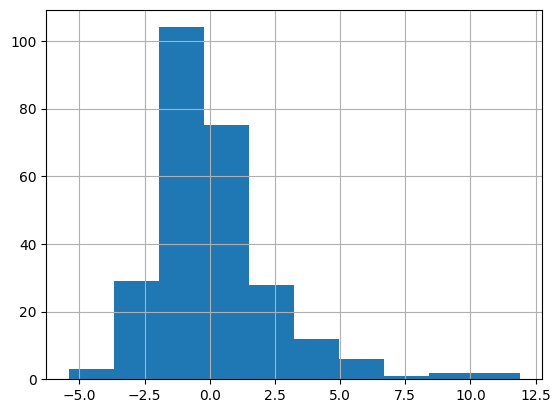

In [117]:
df_signals['Profitability'].hist()

In [119]:
count_profitable = df_signals[df_signals['Profitability'] > 0]['Profitability'].count()
print("Quantidade de valores maiores que zero:", count_profitable)

Quantidade de valores maiores que zero: 115


In [121]:
df_signals[df_signals['Profitability'] > 0]['Profitability'].mean()

2.041722793664765

In [122]:
df_signals[df_signals['Profitability'] < 0]['Profitability'].mean()

-1.276613391420355